<a href="https://colab.research.google.com/github/estevaoMG/Analise_exploratoria/blob/main/C%C3%A3esEGatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os


In [3]:
import tensorflow_datasets as tfds

(train_ds, val_ds), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.EB50R5_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [9]:
IMG_SIZE = (160, 160)
BATCH_SIZE = 32

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE)/255.0, y)).batch(BATCH_SIZE)
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE)/255.0, y)).batch(BATCH_SIZE)

In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # congela os pesos


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation="sigmoid")
])


In [10]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.5052 - loss: 0.6991 - val_accuracy: 0.5099 - val_loss: 0.6913
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 52ms/step - accuracy: 0.5131 - loss: 0.6961 - val_accuracy: 0.5099 - val_loss: 0.6893
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.5235 - loss: 0.6942 - val_accuracy: 0.5101 - val_loss: 0.6876
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.5318 - loss: 0.6924 - val_accuracy: 0.5189 - val_loss: 0.6859
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.5386 - loss: 0.6908 - val_accuracy: 0.5449 - val_loss: 0.6844


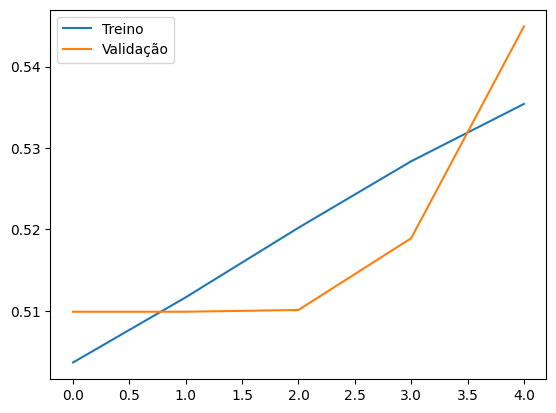

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Treino')
plt.plot(val_acc, label='Validação')
plt.legend()
plt.show()
